In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [21]:
path = r'C:\Users\Bella\Desktop\Data Analytics\Achievment 6'

In [23]:
df = pd.read_csv(os.path.join(path, 'Covid_data_2020.csv'))

## Data cleaning

In [24]:
df.columns

Index(['Date', 'States', 'Cases', 'Deaths', 'Population_estimate'], dtype='object')

In [25]:
df.head(20)

,Date,States,Cases,Deaths,Population_estimate
0,"January, 2020",Arizona,6,0,"7,278,717"
1,"January, 2020",California,14,0,"39,512,223"
2,"January, 2020",Illinois,10,0,"12,671,821"
3,"January, 2020",Washington,11,0,"7,614,893"
4,"February, 2020",Arizona,29,0,"7,278,717"
5,"February, 2020",California,285,0,"39,512,223"
6,"February, 2020",Illinois,59,0,"12,671,821"
7,"February, 2020",Massachusetts,29,0,"6,949,503"
8,"February, 2020",Nebraska,151,0,"1,934,408"
9,"February, 2020",Oregon,2,0,"4,217,737"


In [26]:
df.shape

(509, 5)

In [27]:
# check for missing values

df.isnull().sum()

# no missing values

Date                   0
States                 0
Cases                  0
Deaths                 0
Population_estimate    0
dtype: int64

In [28]:
# check for duplicates

dups = df.duplicated()

In [29]:
dups.shape # No dups

(509,)

C:\Users\Bella\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Cases', ylabel='Density'>

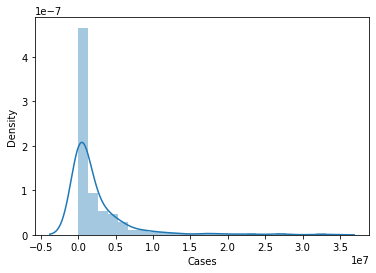

In [30]:
# extreme values check
sns.distplot(df['Cases'], bins=25) # Shows extreme values


In [31]:
df['Cases'].mean() # Check the mean

2360145.2023575637

In [32]:
df['Cases'].median() # Check the median

637475.0

In [33]:
df['Cases'].max() # Check the max

33105809

## Data Prep for regression analysis

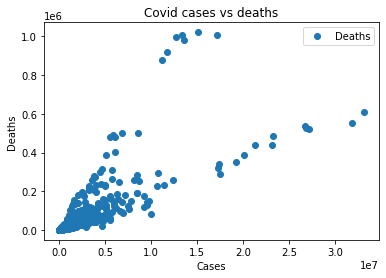

In [34]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Cases', y='Deaths',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Covid cases vs deaths')  
plt.xlabel('Cases')  
plt.ylabel('Deaths')  
plt.show()

In [35]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Cases'].values.reshape(-1,1)
y = df['Deaths'].values.reshape(-1,1)

In [36]:
X

array([[       6],
       [      14],
       [      10],
       [      11],
       [      29],
       [     285],
       [      59],
       [      29],
       [     151],
       [       2],
       [      91],
       [       5],
       [      60],
       [      25],
       [    6129],
       [     851],
       [    6830],
       [    3965],
       [   55406],
       [   18603],
       [   14606],
       [    1887],
       [    2923],
       [   35597],
       [   22119],
       [     594],
       [    1474],
       [    2359],
       [   33167],
       [   10152],
       [    2794],
       [    2408],
       [    3398],
       [   28913],
       [    2110],
       [    8831],
       [   34418],
       [   39225],
       [    4480],
       [    5791],
       [    6536],
       [    1200],
       [    1682],
       [    6859],
       [    2232],
       [   92534],
       [    1989],
       [  464981],
       [    8617],
       [     787],
       [       8],
       [   12114],
       [    

In [37]:
y

array([[      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      0],
       [      1],
       [      0],
       [     42],
       [      8],
       [    118],
       [     36],
       [   1113],
       [    344],
       [    283],
       [     31],
       [     41],
       [    489],
       [    699],
       [     11],
       [      1],
       [     34],
       [    450],
       [    313],
       [     26],
       [     60],
       [     84],
       [   1137],
       [     13],
       [     84],
       [    340],
       [    967],
       [     47],
       [     88],
       [     96],
       [     12],
       [     13],
       [    123],
       [     17],
       [   1165],
       [     16],
       [   7943],
       [     32],
       [      9],
       [      0],
       [    219],
       [    101],
       [    129],
       [    268],
       [  

In [ ]:
# hypothesys: the more intense covid spread is, the higher death rate is.

In [38]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression analysis

In [39]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [40]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [41]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

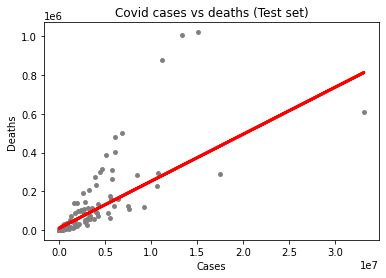

In [42]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Covid cases vs deaths (Test set)')
plot_test.xlabel('Cases')
plot_test.ylabel('Deaths')
plot_test.show()

In [43]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [44]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02425518]]
Mean squared error:  12529508930.268318
R2 score:  0.5432906799699209


In [45]:
y_predicted

array([[ 17275.39423416],
       [ 11420.14498622],
       [ 48317.0538363 ],
       [ 23198.92181714],
       [ 18733.49445098],
       [  9882.02692668],
       [107299.34812631],
       [ 10855.94521672],
       [ 13842.09759289],
       [ 18474.74017812],
       [ 22418.9964662 ],
       [ 10341.17750647],
       [ 12105.81470308],
       [ 33066.89972964],
       [ 12557.47043189],
       [ 10812.7952494 ],
       [270098.54764001],
       [ 62395.80396772],
       [268213.87155172],
       [ 14493.81005609],
       [ 13012.59465161],
       [433596.49041323],
       [ 77392.39441028],
       [ 11025.00382957],
       [ 15668.53699115],
       [  9909.62932286],
       [ 13666.34455004],
       [  9907.15529438],
       [ 38645.61565692],
       [ 30443.16827071],
       [ 49744.54401446],
       [ 95548.97411255],
       [ 10760.57384431],
       [ 13259.82771341],
       [ 89383.598118  ],
       [ 86640.24010548],
       [145476.2271426 ],
       [ 11153.04693103],
       [ 141

In [46]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,12621,17275.394234
1,3470,11420.144986
2,138000,48317.053836
3,30536,23198.921817
4,14008,18733.494451
5,8,9882.026927
6,92881,107299.348126
7,1738,10855.945217
8,9099,13842.097593
9,7457,18474.740178


In [ ]:
##### Compare how the regression fits the training set

In [47]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [48]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [49]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02425518]]
Mean squared error:  7206788846.457166
R2 score:  0.6311677289493127


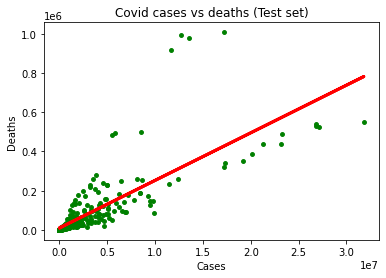

In [50]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Covid cases vs deaths (Test set)')
plot_test.xlabel('Cases')
plot_test.ylabel('Deaths')
plot_test.show()

In [ ]:
# The model confirms the accuracy of the statement: the more intense covid spread is, the higher death rate is. For the time being, you know that while number of cases is an important factor in death rate, it’s not the only one. On the chart we can see the high density of points and also the wide dispersion of points. this just further confirms a single regression line as not being the most accurate prediction model